<a href="https://colab.research.google.com/github/KezhenLi/Final/blob/main/Final4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import array, arange, sqrt
from pylab import plot, show, xlabel, ylabel

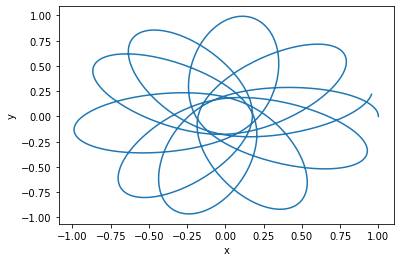

In [5]:
#(a) F = GmM/(r^2) = GmM/L * Integral{dxdydz/(x^2 + y^2 + z^2)^(3/2)} = GmM/L * sqrt(x^2 + y^2)* Integral{dz/(x^2 + y^2 + z^2)^(3/2)
#(b)
G = 1
M = 10
L = 2
x0 = 1
y0 = 0.0
vx0 = 0.0
vy0 = 1.0
t0 = 0.0
tf = 10.0
N = 1000
h = (tf - t0) / N

def f(r, t):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    d = sqrt(x ** 2 + y ** 2)
    return array([vx, -G * M * x / (d ** 2 * sqrt(d ** 2 + L ** 2 / 4)),
                  vy, -G * M * y / (d ** 2 * sqrt(d ** 2 + L ** 2 / 4))], float)

tpoints = arange(t0, tf, h)
xpoints = []
ypoints = []
r = array([x0, vx0, y0, vy0], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

plot(xpoints, ypoints)
xlabel('x')
ylabel('y')
show()